## A KPMG Data Analysis virtual internship project </br>
In this project we need to identify various errors and inconsistencies and clean the dataset while pointing out the problems with the raw dataset and solving them.

I will be following the below mentioned steps for my data cleaning process :
1. checking data accuracy 
2. checking data completeness 
3. data consistency 
4. data currency 
5. data relevancy 
6. data validity (i.e., containing allowable values or not)
7. and lastly data uniqueness

In [2]:
import pandas as pd 
file = 'C:/Users/Bidee/Downloads/KPMG_VI_New_raw_data_update_final1.xlsx'
data = pd.ExcelFile(file)
print(data.sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [3]:
transaction_raw = data.parse('Transactions',skiprows = 1)
customerDemo_raw = data.parse('CustomerDemographic',skiprows = 1)
cust_Address_raw = data.parse('CustomerAddress',skiprows = 1)
cust_list_raw = data.parse('NewCustomerList',skiprows = 1)

C:\Users\Bidee\AppData\Local\Temp\ipykernel_6316\850831179.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customerDemo_raw = data.parse('CustomerDemographic',skiprows = 1)
C:\Users\Bidee\AppData\Local\Temp\ipykernel_6316\850831179.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cust_list_raw = data.parse('NewCustomerList',skiprows = 1)


In [4]:
# importing some necessary packages
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns 
sns.set()

In [5]:
transaction_raw.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
18746,18747,87,443,2017-06-08,0.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2006-05-22
9214,9215,80,1551,2017-10-17,1.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,1997-01-25
9469,9470,49,400,2017-05-04,1.0,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2012-06-04
12165,12166,40,3113,2017-01-21,0.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.90,1999-12-04
15825,15826,11,3426,2017-01-04,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,2007-08-04


In [6]:
transaction_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

From the above info we can see there are missing data in the transaction dataframe

In [7]:
transaction_raw['online_order'].value_counts()
#since this is a categorical data basically stating that 0 = False and 1 = True for online orders
# so we're setting the datatype to category
# followed by same process for a few other columns 



1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [8]:
transaction_raw['online_order'] = transaction_raw['online_order'].astype('category')

In [9]:
transaction_raw['online_order'].dtype


CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [10]:
transaction_raw['order_status'].value_counts()
# so out of 20,000 entries 19,821 orders are approved (roughly 99.1% of the orders are approved) rest 179 are cancelled.

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [11]:
# converting this into categorical dtype 
transaction_raw['order_status'] = transaction_raw['order_status'].astype('category')


In [12]:
transaction_raw['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [13]:
transaction_raw['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [14]:
transaction_raw['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [15]:
# all these can be classified as categorical data so like above converting them to categorical data. 
transaction_raw[['product_size','product_line','product_class']] = transaction_raw[['product_size','product_line','product_class']].astype('category')

In [16]:
transaction_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  category      
 5   order_status             20000 non-null  category      
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  category      
 8   product_class            19803 non-null  category      
 9   product_size             19803 non-null  category      
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

all the categorical data has been converted from object to category. </br>
till now we can see that upto product_size there are no inconsistencies. looking at the last 3 cols

In [17]:
transaction_raw['list_price'].describe()

count    20000.000000
mean      1107.829449
std        582.825242
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

In [18]:
transaction_raw['standard_cost'].describe()

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

The list_price and standard_cost columns contains the price at which it was sold and that item's standard price , </br >
max standard_cost is 1759.85 whereas that of list_price is 2091.47. none of these contain any incorrect data.

In [19]:
# lastly the product_first_sold_date column

transaction_raw['product_first_sold_date'].sample(10)

5865    2015-08-10
4687    1997-02-09
5711    2006-10-01
19998   2004-08-17
6317    1996-11-09
11579   2016-11-22
11814   2011-03-16
18934   2016-07-09
7956    1996-04-05
17083   2011-01-10
Name: product_first_sold_date, dtype: datetime64[ns]

hence data accuracy has been verified that there remains no inaccurate data.

2. checking for data completeness or missing data 

It's already clear from before that ther were a lot of missing values in the dataset . Lets check how many and where they belong.

In [20]:
transaction_raw.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

We might want to just drop all the missing values, as in this case there was no instruction to drop them </br>
so i'll separate the missing from the complete one and store them separately and work with the complete dataset

In [21]:
transaction_no_missing = transaction_raw[~transaction_raw.isna()]
#transaction_no_missing.isna().sum()

transac_no_missing = transaction_no_missing.copy()
transaction_complete = transac_no_missing.dropna()
transaction_complete.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [22]:
transaction_complete.describe(include = 'all')

C:\Users\Bidee\AppData\Local\Temp\ipykernel_6316\830729945.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction_complete.describe(include = 'all')
C:\Users\Bidee\AppData\Local\Temp\ipykernel_6316\830729945.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction_complete.describe(include = 'all')


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,19445.000000,19445.000000,19445.000000,19445,19445.0,19445,19445,19445,19445,19445,19445.000000,19445.000000,19445
unique,NaN,NaN,NaN,364,2.0,2,6,4,3,3,NaN,NaN,100
top,NaN,NaN,NaN,2017-08-18 00:00:00,1.0,Approved,Solex,Standard,medium,medium,NaN,NaN,1992-10-02 00:00:00
freq,NaN,NaN,NaN,81,9739.0,19273,4169,13920,13587,12767,NaN,NaN,230
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991-01-21 00:00:00
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-06 00:00:00
mean,9989.257393,45.797737,1739.467267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1107.337193,555.585260,NaN
std,5779.669087,30.571996,1011.889153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,582.662400,405.596541,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,NaN
25%,4976.000000,18.000000,857.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,NaN


<AxesSubplot:ylabel='Frequency'>

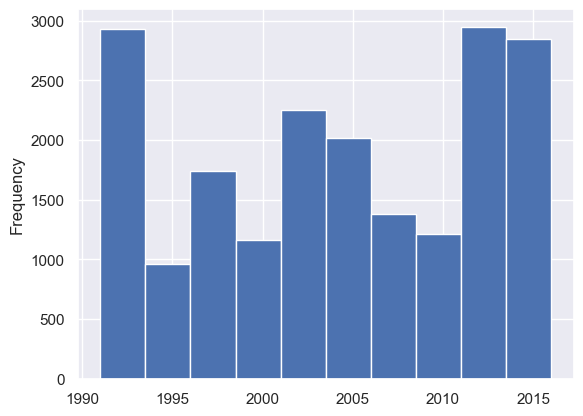

In [23]:
# checking the last column(product_first_sold_date)
import datetime as dt
date_year = transaction_complete['product_first_sold_date'].dt.year
date_year.plot(kind = 'hist')
#transaction_complete['product_first_sold_date'].plot(kind = 'hist')

3. checking values free from contradiction

After analysisng the dataset the only contradictory part is the list_price and the standard_cost, standard_cost seems </br>
lower for every product as compared to it's list_price

all other checkpoints 4,5,6 are already passed while doing our data cleaning till now so we can directly jump to our last case </br>
that is data uniqueness

7. Data Uniqueness (checking for duplicates)

In [24]:
is_duplicates = transaction_complete.duplicated(keep = False)
is_duplicates.value_counts()

False    19445
dtype: int64

so we can see there are no duplicate records so all passed.

Repeating the same steps with the other 2 datasets , CustomerDemographic , CustomerAddress

In [25]:
customerDemo_raw

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [26]:
customerDemo_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [27]:
customerDemo_raw.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

Here are a lot of missing values we need to check for.

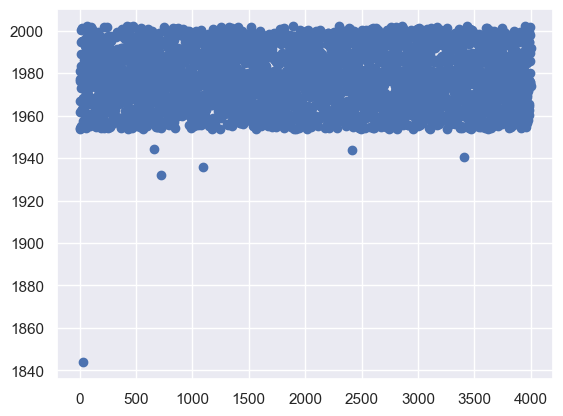

In [28]:
plt.scatter(customerDemo_raw['customer_id'],customerDemo_raw['DOB'])
plt.show()
#there belongs only 1 outlier in the dob dataframe so thats an inaccurate data we need to drop

In [29]:
customerDemo_raw.drop(axis = 0, index = 33)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [30]:
from datetime import datetime
customerDemo_raw[customerDemo_raw['DOB'] < datetime(1930,1,1)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


In [31]:
customerDemo_raw.drop(axis = 1,columns = 'default',inplace = True)
customerDemo_raw

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [32]:
duplicates = customerDemo_raw.duplicated()
duplicates.value_counts()
# so here are no duplicates either

False    4000
dtype: int64

In [33]:
customerDemo_raw['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [34]:
customerDemo_raw['gender'] = customerDemo_raw['gender'].str.replace('Femal','F')
customerDemo_raw['gender'].value_counts()

Fe      2037
Male    1872
U         88
F          2
M          1
Name: gender, dtype: int64

In [35]:
customerDemo_raw['gender'] = customerDemo_raw['gender'].str.replace('Fe','F')
customerDemo_raw['gender'] = customerDemo_raw['gender'].str.replace('Male','M')
customerDemo_raw['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

In [36]:
customerDemo_raw.sample(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
2245,2246,Giraldo,Lacer,M,16,1979-01-24,Database Administrator III,NaN,Mass Customer,N,Yes,13.0
3516,3517,Domeniga,Terney,F,47,1957-07-04,Accounting Assistant IV,NaN,Mass Customer,N,Yes,6.0
704,705,Eddie,Yekel,M,48,1964-01-16,Quality Engineer,Retail,High Net Worth,N,No,14.0
612,613,Carolann,O'Hallagan,F,4,1989-11-14,Analyst Programmer,Property,High Net Worth,N,No,17.0
2846,2847,Noreen,Matelaitis,F,50,1976-03-21,Occupational Therapist,Health,Mass Customer,N,No,12.0


In [37]:
customerDemo_raw['job_title'].isna().sum()

506

In [38]:
customerDemo_raw[customerDemo_raw['job_title'].isna()].sample(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3155,3156,Bearnard,Letixier,M,23,1976-09-28,NaN,Financial Services,Mass Customer,N,No,4.0
2551,2552,Allard,Skipton,M,1,1973-11-02,NaN,Manufacturing,Affluent Customer,N,Yes,17.0
465,466,Jarad,Bauser,M,84,1991-01-27,NaN,Manufacturing,Affluent Customer,N,Yes,2.0
3087,3088,Hilarius,Trenbey,M,92,1974-05-09,NaN,Retail,Affluent Customer,N,Yes,17.0
1710,1711,Marie-jeanne,Mattson,F,81,1993-09-26,NaN,Manufacturing,High Net Worth,N,Yes,7.0


There seems to be a lot of missing values in job_title (506) but we're not going to drop them as the other details </br>
of the customer are accurate and are significant contributors to the recommendation model.

In [39]:
customerDemo_raw['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [40]:
customerDemo_raw['wealth_segment'].isna().sum()

0

In [41]:
cust_Address_raw.sample(5)

,customer_id,address,postcode,state,country,property_valuation
232,237,4263 Hanson Place,2021,NSW,Australia,11
520,525,81848 Amoth Road,3282,Victoria,Australia,2
3756,3761,5 Atwood Crossing,2321,NSW,Australia,3
3709,3714,0616 Messerschmidt Place,2350,NSW,Australia,4
1306,1311,0 Moland Parkway,4127,QLD,Australia,7


In [42]:
cust_Address_raw.isna().sum()
# there are no missing data in this dataset

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [43]:
cust_Address_raw.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [44]:
transaction_complete
customerDemo_raw
cust_Address_raw

customer_trxn_half = transaction_complete.merge(customerDemo_raw, on = 'customer_id', how = 'left')
customer_trxn = customer_trxn_half.merge(cust_Address_raw, on = 'customer_id', how = 'left')
customer_trxn

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Retail,Affluent Customer,N,No,22.0,586 Miller Parkway,2835.0,NSW,Australia,1.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,No,16.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Retail,Affluent Customer,N,Yes,2.0,0601 Stephen Place,2292.0,NSW,Australia,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,...,Manufacturing,Mass Customer,N,Yes,7.0,3 Hayes Court,3109.0,VIC,Australia,10.0
19441,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,...,Financial Services,Mass Customer,N,No,19.0,0 Pearson Crossing,4405.0,QLD,Australia,1.0
19442,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,...,Telecommunications,High Net Worth,N,No,14.0,10055 Old Shore Lane,3630.0,VIC,Australia,1.0
19443,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,Financial Services,Mass Customer,N,Yes,20.0,1 Wayridge Park,4301.0,QLD,Australia,1.0


In [45]:
customer_trxn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  datetime64[ns]
 4   online_order                         19445 non-null  category      
 5   order_status                         19445 non-null  category      
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  category      
 8   product_class                        19445 non-null  category      
 9   product_size                         19445 non-null  category      
 10  list_price

In [46]:
customer_trxn['owns_car'].value_counts()

Yes    9799
No     9643
Name: owns_car, dtype: int64

In [47]:
customer_trxn.to_csv('Sprocket_customer_data.csv')